In [1]:
import numpy as np
import igraph
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

In [2]:
#funcions utilitzades per llegir el txt que conté la informació de la xarxa
def retorna_parella(string):
    return [int(i) for i in string.split(" ")]
def clean(string):
    if string[-1]=="n":
        return string[0:-2]
    else:
        return string

In [3]:
with open("facebook_combined.txt") as f:#guardam les arestes

    arestes = [retorna_parella(clean(i)) for i in f.readlines()]
print(len(arestes))

88234


In [4]:
%%time
n=4039#cream la xarxa
G=igraph.Graph(n=n)#4039, 348
for aresta in arestes:
    G.add_edge(aresta[0],aresta[1])

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
Wall time: 3min 1s


In [5]:
print("Número de vértices: ",G.vcount())#algunes característiques sobre la xarxa
m=G.ecount()
print("Número de aristas: ",m)
print("Longitud de camino media: ",G.average_path_length())
print("Diámetro: ",G.diameter())
grados=G.degree()
grau_mitja = sum(grados)/len(grados)
print("Grado medio: ", grau_mitja)

Número de vértices:  4039
Número de aristas:  88234
Longitud de camino media:  3.6925068496963913
Diámetro:  8
Grado medio:  43.69101262688784


In [6]:
p = 2*m/(n*(n-1))#cream la xarxa amb el model d'erdos renyi
G_ER=[]
G_ER.append(igraph.Graph.Erdos_Renyi(n,p=p))
G_ER.append(igraph.Graph.Erdos_Renyi(n,p=p))
G_ER.append(igraph.Graph.Erdos_Renyi(n,m=m))
G_ER.append(igraph.Graph.Erdos_Renyi(n,m=m))

In [7]:
G_MC = []#cream la xarxa amb el model de configuracio
G_MC.append(igraph.Graph.Realize_Degree_Sequence(grados, method='smallest'))
G_MC.append(igraph.Graph.Realize_Degree_Sequence(grados, method='smallest'))
G_MC.append(igraph.Graph.Realize_Degree_Sequence(grados, method='smallest'))
G_MC.append(igraph.Graph.Realize_Degree_Sequence(grados, method='largest'))
G_MC.append(igraph.Graph.Realize_Degree_Sequence(grados, method='largest'))
G_MC.append(igraph.Graph.Realize_Degree_Sequence(grados, method='index'))
G_MC.append(igraph.Graph.Realize_Degree_Sequence(grados, method='index'))

0
2
5
8
11
Wall time: 29min 17s


Text(0.5, 1.0, 'Model de configuració index')

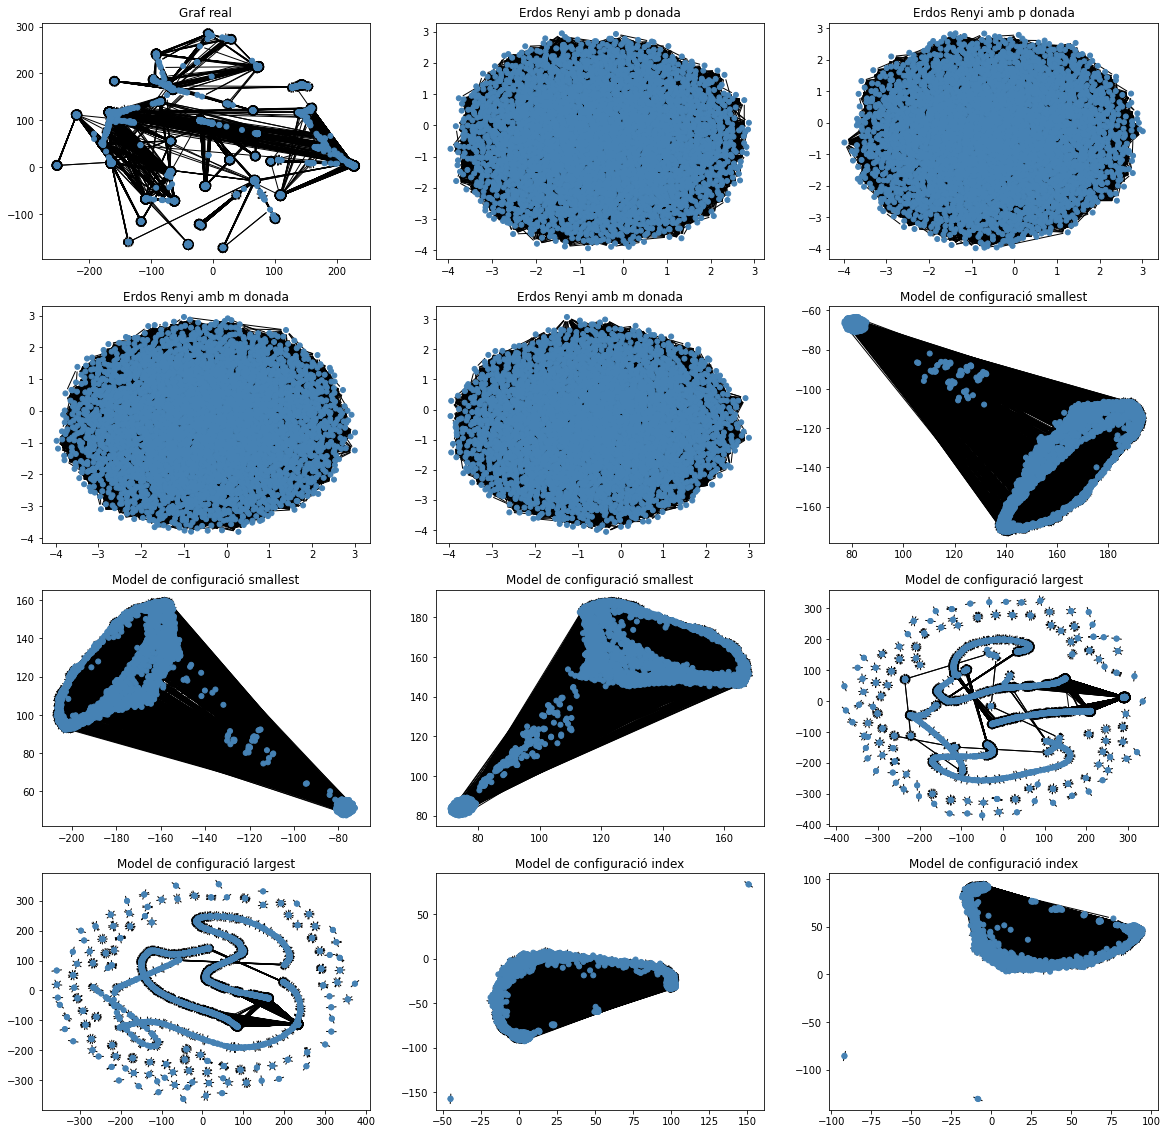

In [13]:
%%time
#dibuixam totes les xarxes
plt.rcParams['figure.figsize']=[20,20]
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,3)
print(0)
igraph.plot(G, target=ax1[0])
ax1[0].set_title("Graf real")
igraph.plot(G_ER[0], target=ax1[1])
ax1[1].set_title("Erdos Renyi amb p donada")
print(2)
igraph.plot(G_ER[1], target=ax1[2])
ax1[2].set_title("Erdos Renyi amb p donada")

igraph.plot(G_ER[2], target=ax2[0])
ax2[0].set_title("Erdos Renyi amb m donada")
igraph.plot(G_ER[3], target=ax2[1])
ax2[1].set_title("Erdos Renyi amb m donada")
print(5)
igraph.plot(G_MC[0], target=ax2[2])
ax2[2].set_title("Model de configuració smallest")

igraph.plot(G_MC[1], target=ax3[0])
ax3[0].set_title("Model de configuració smallest")
igraph.plot(G_MC[2], target=ax3[1])
ax3[1].set_title("Model de configuració smallest")
print(8)
igraph.plot(G_MC[3], target=ax3[2])
ax3[2].set_title("Model de configuració largest")

igraph.plot(G_MC[4], target=ax4[0])
ax4[0].set_title("Model de configuració largest")
igraph.plot(G_MC[5], target=ax4[1])
ax4[1].set_title("Model de configuració index")
print(11)
igraph.plot(G_MC[6], target=ax4[2])
ax4[2].set_title("Model de configuració index")



In [8]:
%%time
betw = [G.betweenness()]#calculam els diferents indexos de centralitat i clustering de les xarxes
clos = [G.closeness()]
harm = [G.harmonic_centrality()]
clust = [G.transitivity_undirected()]
for graf in G_ER:
    betw.append(graf.betweenness())
    clos.append(graf.closeness())
    harm.append(graf.harmonic_centrality())
    clust.append(graf.transitivity_undirected())
for graf in G_MC:
    betw.append(graf.betweenness())
    clos.append(graf.closeness())
    harm.append(graf.harmonic_centrality())
    clust.append(graf.transitivity_undirected())

Wall time: 1min 38s


In [9]:
for b in betw:#ordenam els indexos per graficarlos
    b.sort()
for c in clos:
    c.sort()
for h in harm:
    h.sort()

0
1
2
Wall time: 480 ms


Text(0.5, 1.0, 'Model de configuració index')

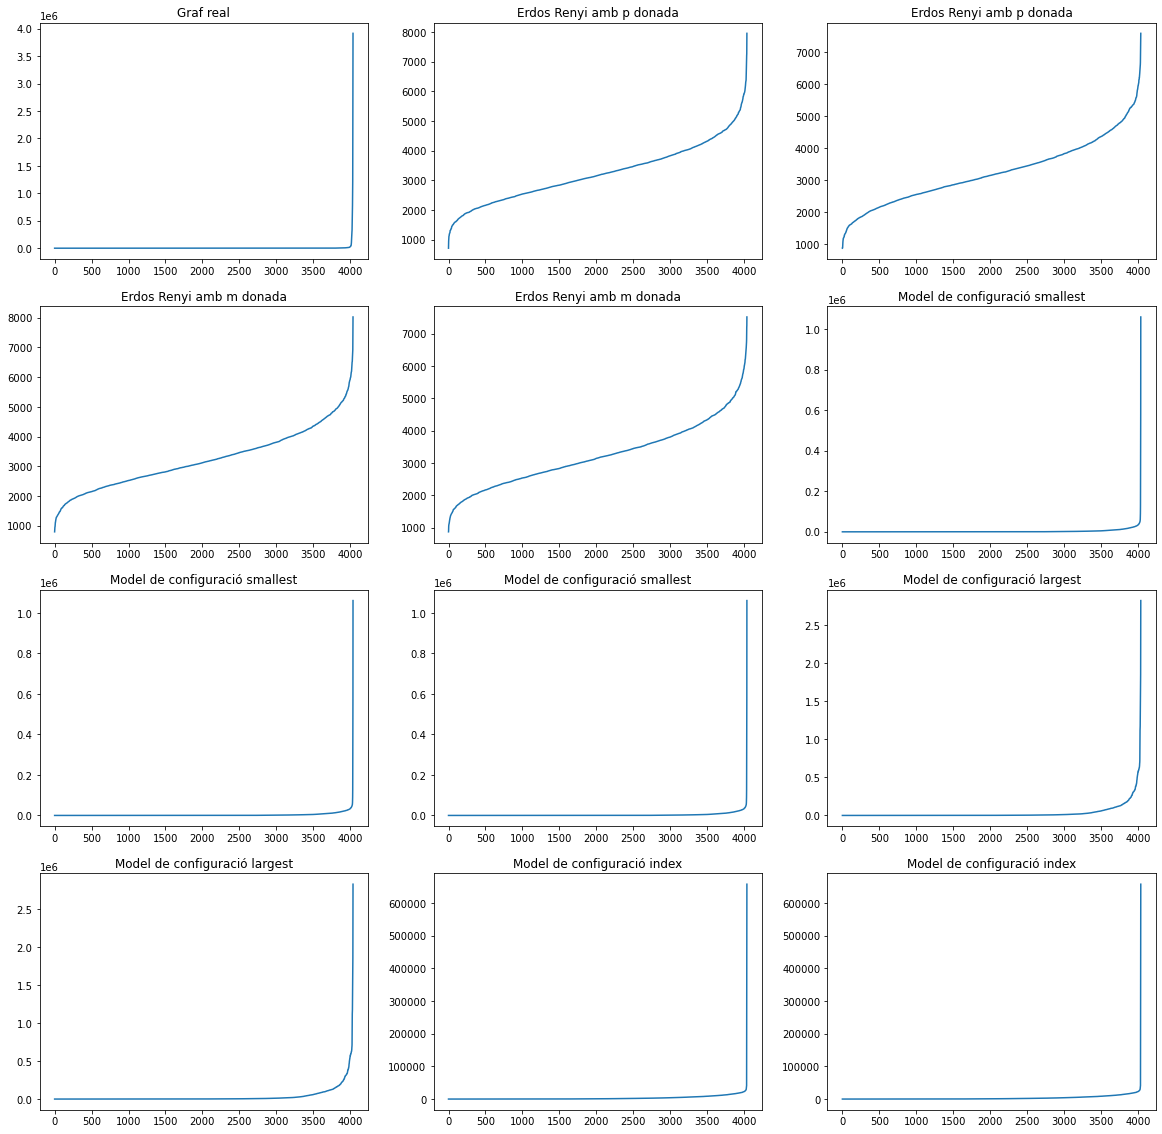

In [16]:
%%time
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,3)#grafiques dels indexos betweenness
ax1[0].plot(betw[0])
ax1[0].set_title("Graf real")
print(0)
ax1[1].plot(betw[1])
ax1[1].set_title("Erdos Renyi amb p donada")
print(1)
ax1[2].plot(betw[2])
ax1[2].set_title("Erdos Renyi amb p donada")

ax2[0].plot(betw[3])
ax2[0].set_title("Erdos Renyi amb m donada")
ax2[1].plot(betw[4])
ax2[1].set_title("Erdos Renyi amb m donada")
ax2[2].plot(betw[5])
ax2[2].set_title("Model de configuració smallest")

ax3[0].plot(betw[6])
ax3[0].set_title("Model de configuració smallest")
print(2)
ax3[1].plot(betw[7])
ax3[1].set_title("Model de configuració smallest")
ax3[2].plot(betw[8])
ax3[2].set_title("Model de configuració largest")

ax4[0].plot(betw[9])
ax4[0].set_title("Model de configuració largest")
ax4[1].plot(betw[10])
ax4[1].set_title("Model de configuració index")
ax4[2].plot(betw[11])
ax4[2].set_title("Model de configuració index")


Wall time: 243 ms


Text(0.5, 1.0, 'Model de configuració index')

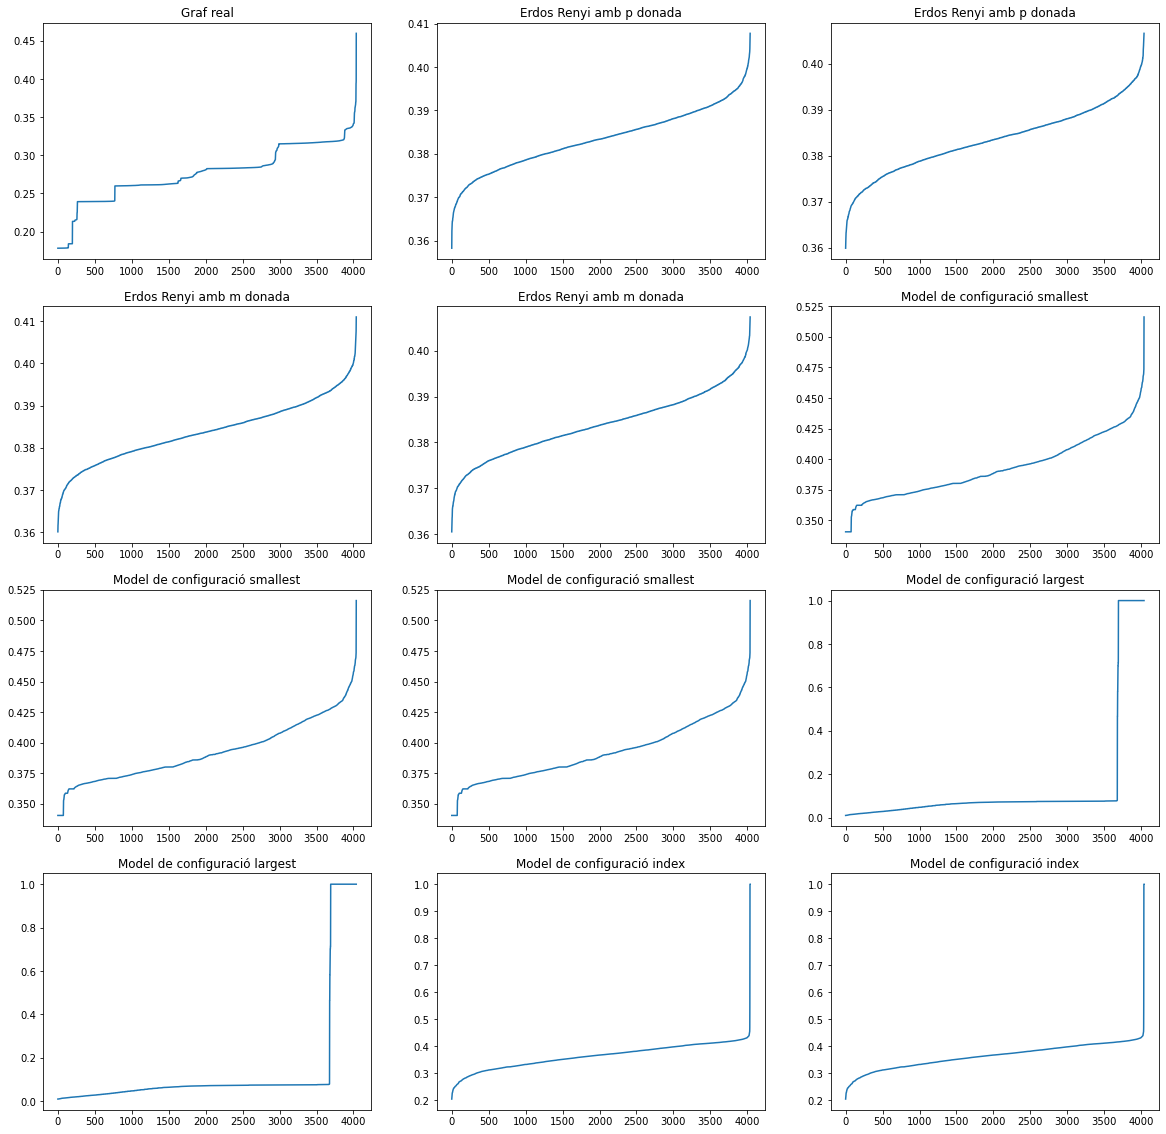

In [17]:
%%time
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,3)#grafiques dels indexos closeness
ax1[0].plot(clos[0])
ax1[0].set_title("Graf real")
ax1[1].plot(clos[1])
ax1[1].set_title("Erdos Renyi amb p donada")
ax1[2].plot(clos[2])
ax1[2].set_title("Erdos Renyi amb p donada")

ax2[0].plot(clos[3])
ax2[0].set_title("Erdos Renyi amb m donada")
ax2[1].plot(clos[4])
ax2[1].set_title("Erdos Renyi amb m donada")
ax2[2].plot(clos[5])
ax2[2].set_title("Model de configuració smallest")

ax3[0].plot(clos[6])
ax3[0].set_title("Model de configuració smallest")
ax3[1].plot(clos[7])
ax3[1].set_title("Model de configuració smallest")
ax3[2].plot(clos[8])
ax3[2].set_title("Model de configuració largest")

ax4[0].plot(clos[9])
ax4[0].set_title("Model de configuració largest")
ax4[1].plot(clos[10])
ax4[1].set_title("Model de configuració index")
ax4[2].plot(clos[11])
ax4[2].set_title("Model de configuració index")


Wall time: 225 ms


Text(0.5, 1.0, 'Model de configuració index')

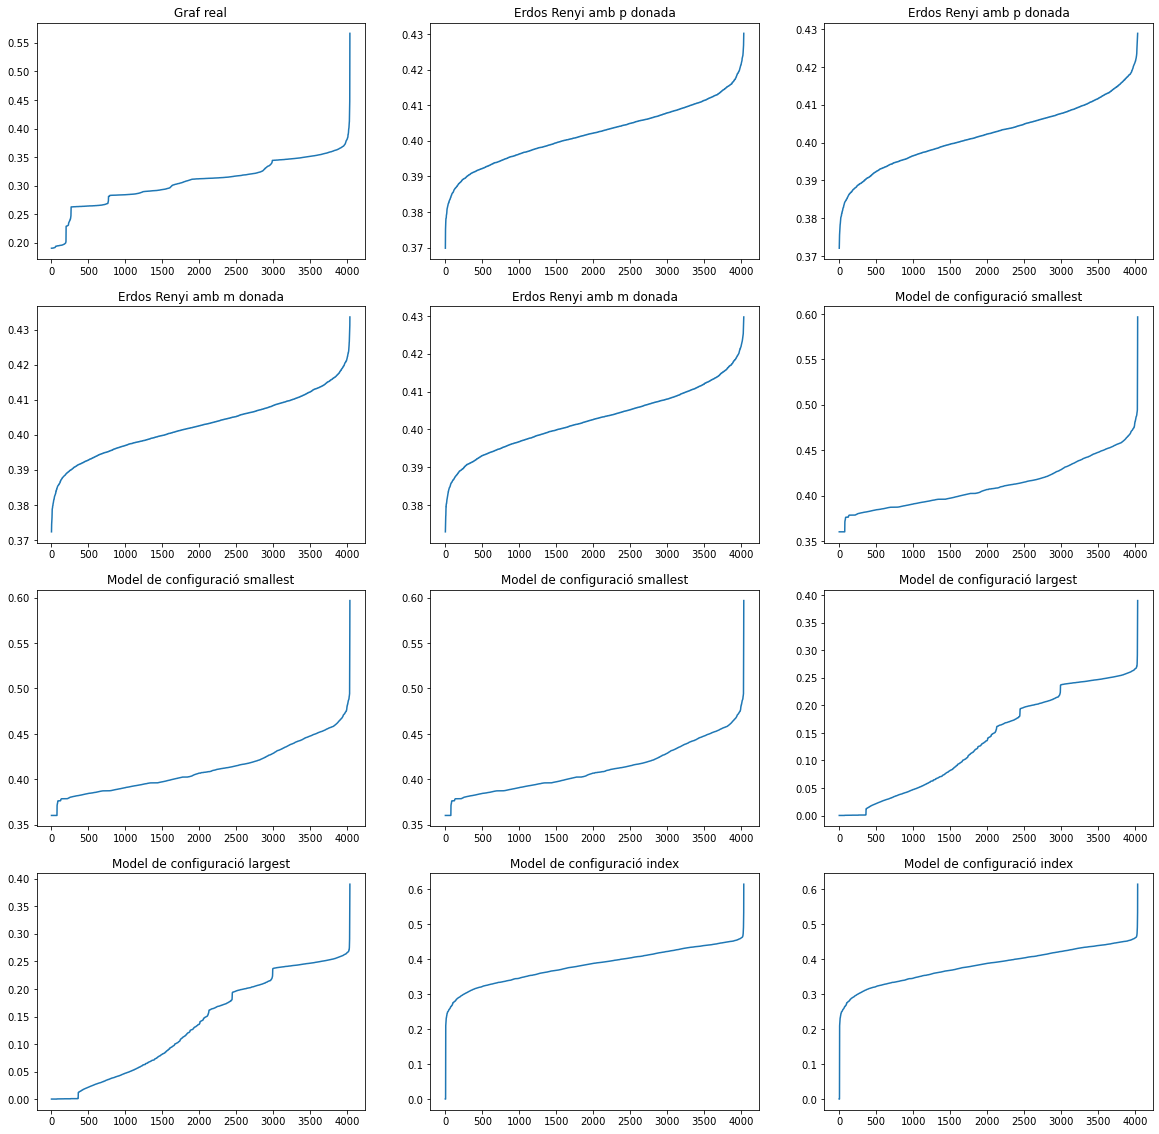

In [18]:
%%time
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,3)#grafiques dels indexos harmonic
ax1[0].plot(harm[0])
ax1[0].set_title("Graf real")
ax1[1].plot(harm[1])
ax1[1].set_title("Erdos Renyi amb p donada")
ax1[2].plot(harm[2])
ax1[2].set_title("Erdos Renyi amb p donada")

ax2[0].plot(harm[3])
ax2[0].set_title("Erdos Renyi amb m donada")
ax2[1].plot(harm[4])
ax2[1].set_title("Erdos Renyi amb m donada")
ax2[2].plot(harm[5])
ax2[2].set_title("Model de configuració smallest")

ax3[0].plot(harm[6])
ax3[0].set_title("Model de configuració smallest")
ax3[1].plot(harm[7])
ax3[1].set_title("Model de configuració smallest")
ax3[2].plot(harm[8])
ax3[2].set_title("Model de configuració largest")

ax4[0].plot(harm[9])
ax4[0].set_title("Model de configuració largest")
ax4[1].plot(harm[10])
ax4[1].set_title("Model de configuració index")
ax4[2].plot(harm[11])
ax4[2].set_title("Model de configuració index")


<BarContainer object of 6 artists>

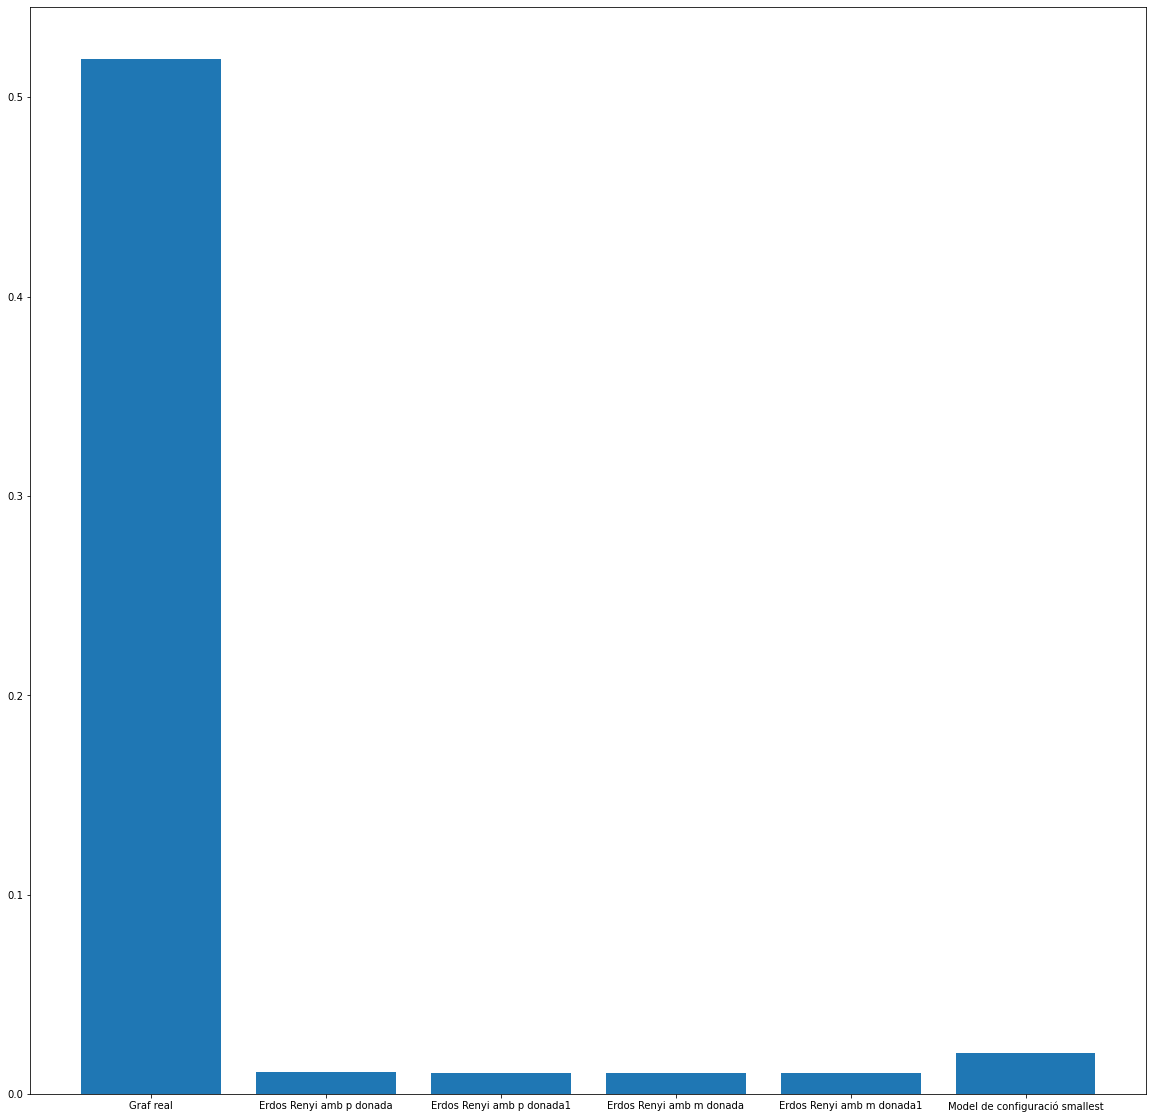

In [21]:
etiquetas = ["Graf real",
            "Erdos Renyi amb p donada",
            "Erdos Renyi amb p donada1",
            "Erdos Renyi amb m donada",
            "Erdos Renyi amb m donada1",
            "Model de configuració smallest",
            "Model de configuració smallest1",
            "Model de configuració smallest2",
            "Model de configuració largest",
            "Model de configuració largest1",
            "Model de configuració index",
            "Model de configuració index1"]
#dibuixam els indexos de clustering en dos barplots per millor visualitzacio

<BarContainer object of 6 artists>

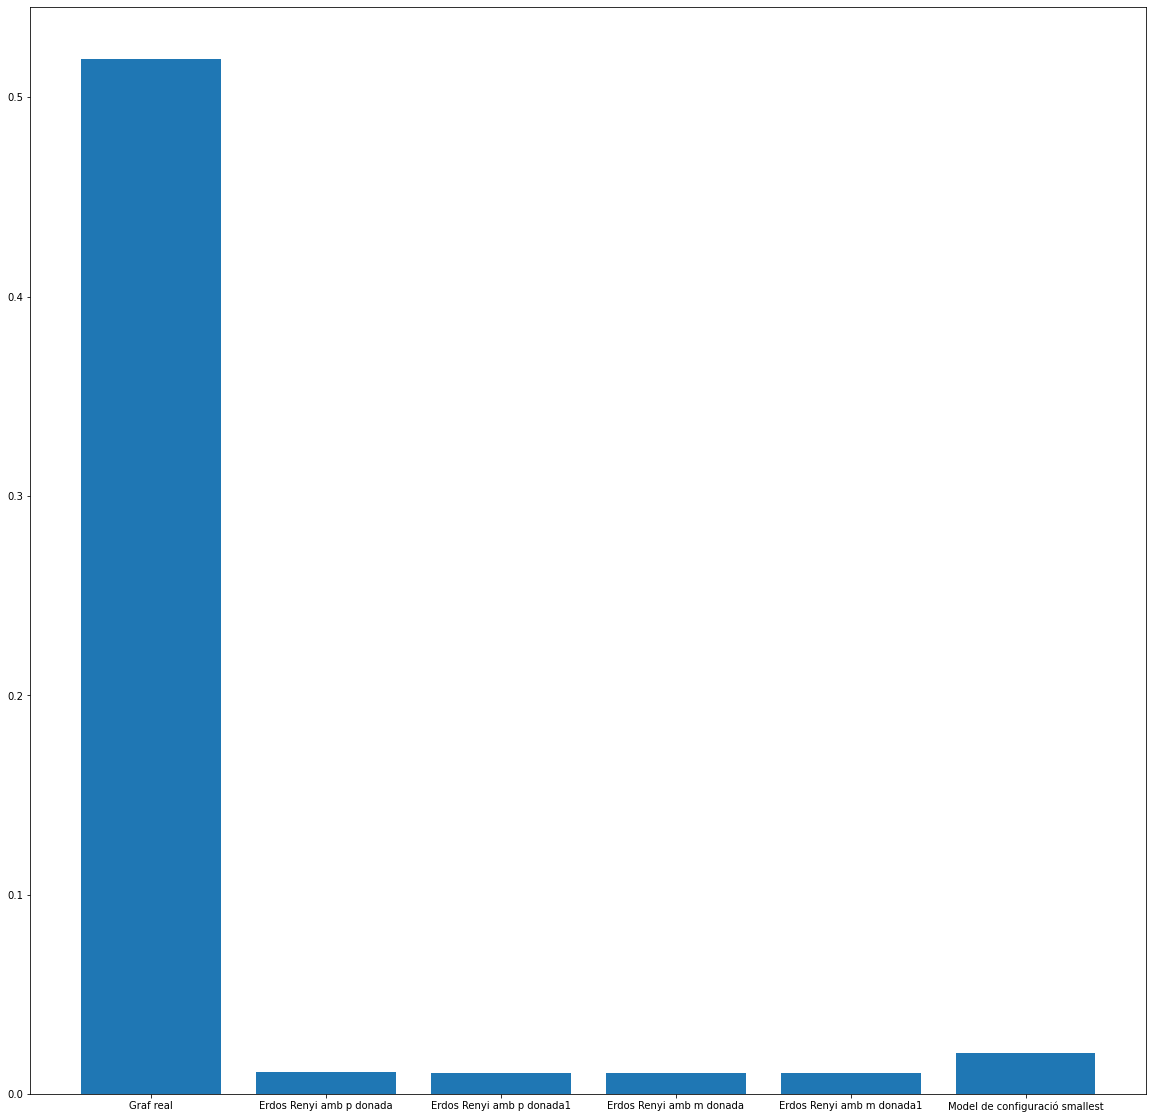

In [22]:
plt.bar(etiquetas[0:6],clust[0:6])

[0.5191742775433075,
 0.010969791360836182,
 0.01085700541452173,
 0.010890528658199975,
 0.010777033710455523,
 0.020907907363823076,
 0.020907907363823076,
 0.020907907363823076,
 0.30061389078878253,
 0.30061389078878253,
 0.04925393852331906,
 0.04925393852331906]

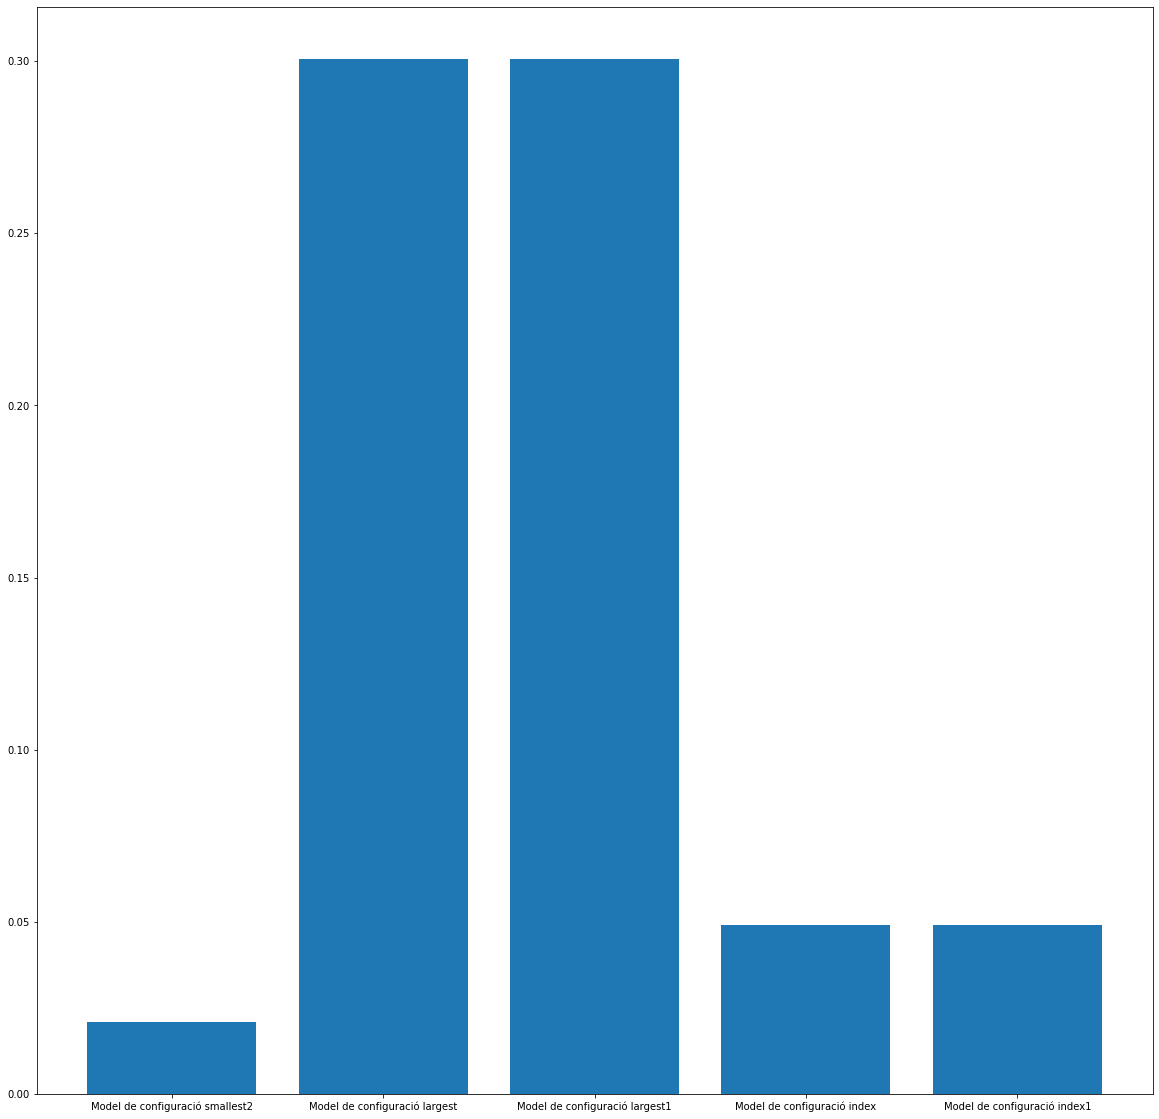

In [24]:
plt.bar(etiquetas[7:12],clust[7:12])
clust

In [19]:
print(G.clusters().giant().vcount())#comprovam els tamanys de les GC de les diferents xarxes
for graf in G_ER:
    print(graf.clusters().giant().vcount())
for graf in G_MC:
    print(graf.clusters().giant().vcount())

4039
4039
4039
4039
4039
4039
4039
4039
3677
3677
4035
4035


In [18]:
%%time
#executam els algoritmes de comunitats sobre les diferents xarxes
community_fastgreedy = [G.community_fastgreedy()]
community_infomap = [G.community_infomap()]
community_leading_eigenvector = [G.community_leading_eigenvector()]
for graf in G_ER:
    community_fastgreedy.append(graf.community_fastgreedy())
    community_infomap.append(graf.community_infomap())
    community_leading_eigenvector.append(graf.community_leading_eigenvector())
for graf in G_MC:
    community_fastgreedy.append(graf.community_fastgreedy())
    community_infomap.append(graf.community_infomap())
    community_leading_eigenvector.append(graf.community_leading_eigenvector())


Wall time: 2min 13s


In [29]:
for i in range(12):#miram el nombre de clusters a cada xarxa i per cada algortime
    print(community_fastgreedy[i].as_clustering().summary())

Clustering with 4039 elements and 13 clusters
Clustering with 4039 elements and 7 clusters
Clustering with 4039 elements and 4 clusters
Clustering with 4039 elements and 4 clusters
Clustering with 4039 elements and 6 clusters
Clustering with 4039 elements and 3 clusters
Clustering with 4039 elements and 3 clusters
Clustering with 4039 elements and 3 clusters
Clustering with 4039 elements and 115 clusters
Clustering with 4039 elements and 115 clusters
Clustering with 4039 elements and 6 clusters
Clustering with 4039 elements and 6 clusters


In [30]:
for i in range(12):
    print(community_infomap[i].summary())

Clustering with 4039 elements and 91 clusters
Clustering with 4039 elements and 1 clusters
Clustering with 4039 elements and 1 clusters
Clustering with 4039 elements and 1 clusters
Clustering with 4039 elements and 1 clusters
Clustering with 4039 elements and 6 clusters
Clustering with 4039 elements and 5 clusters
Clustering with 4039 elements and 6 clusters
Clustering with 4039 elements and 172 clusters
Clustering with 4039 elements and 172 clusters
Clustering with 4039 elements and 47 clusters
Clustering with 4039 elements and 50 clusters


In [31]:
for i in range(12):
    print(community_leading_eigenvector[i].summary())

Clustering with 4039 elements and 18 clusters
Clustering with 4039 elements and 5 clusters
Clustering with 4039 elements and 5 clusters
Clustering with 4039 elements and 4 clusters
Clustering with 4039 elements and 4 clusters
Clustering with 4039 elements and 3 clusters
Clustering with 4039 elements and 3 clusters
Clustering with 4039 elements and 3 clusters
Clustering with 4039 elements and 125 clusters
Clustering with 4039 elements and 125 clusters
Clustering with 4039 elements and 5 clusters
Clustering with 4039 elements and 5 clusters


0
2
Wall time: 8min 13s


Text(0.5, 1.0, 'Model de configuració index')

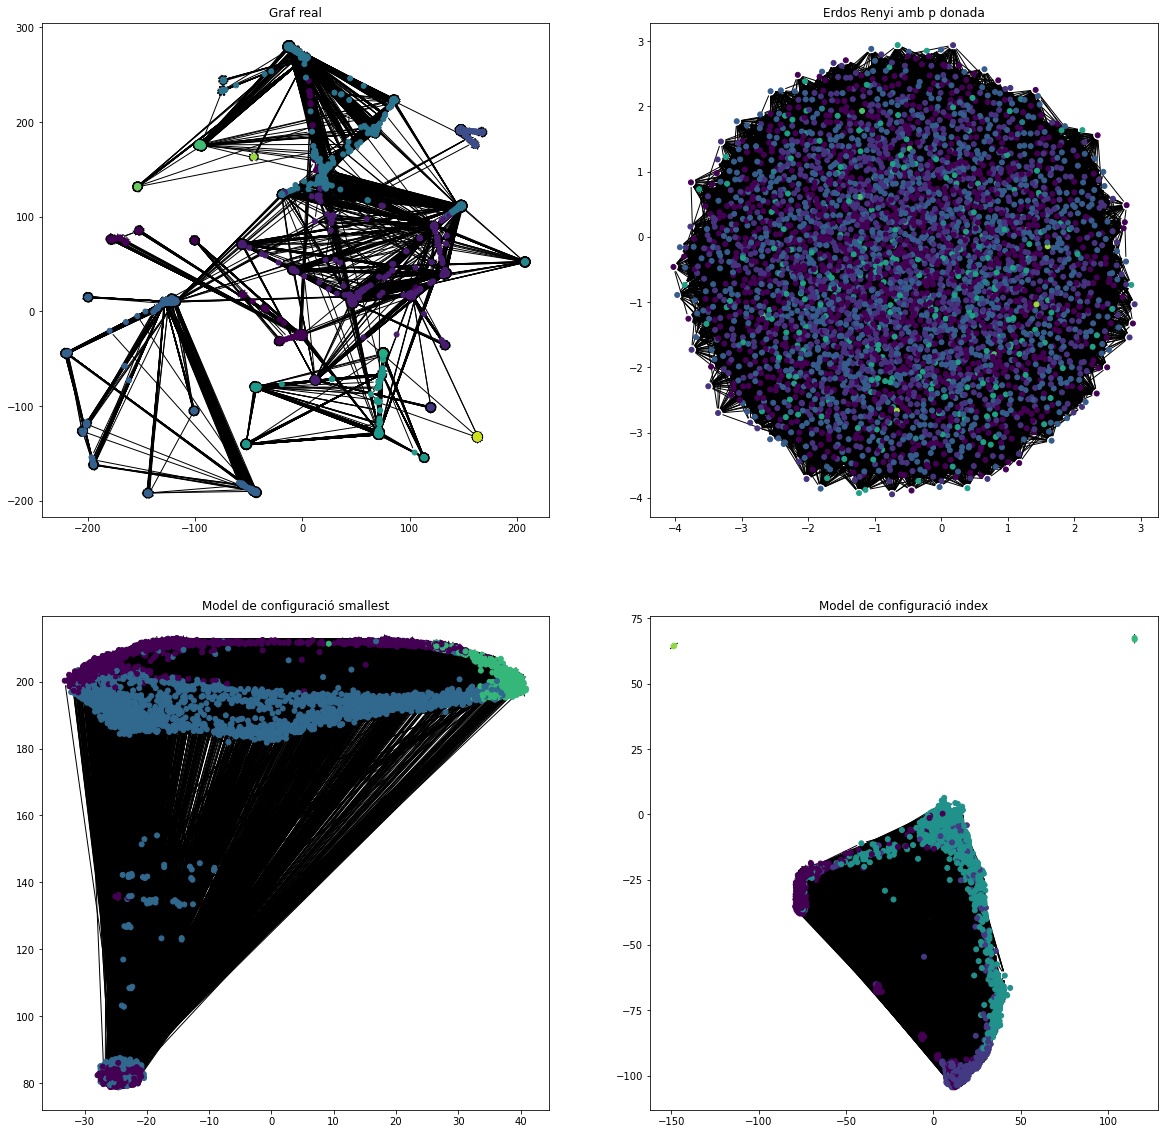

In [12]:
%%time
fig, (ax1,ax2) = plt.subplots(2,2)# visualitzam les comunitats
print(0)
igraph.plot(community_fastgreedy[0].as_clustering(), target=ax1[0])
ax1[0].set_title("Graf real")
igraph.plot(community_fastgreedy[1].as_clustering(), target=ax1[1])
ax1[1].set_title("Erdos Renyi amb p donada")
print(2)


igraph.plot(community_fastgreedy[5].as_clustering(), target=ax2[0])
ax2[0].set_title("Model de configuració smallest")

igraph.plot(community_fastgreedy[10].as_clustering(), target=ax2[1])
ax2[1].set_title("Model de configuració index")


0
2
Wall time: 4min 31s


Text(0.5, 1.0, 'Model de configuració index')

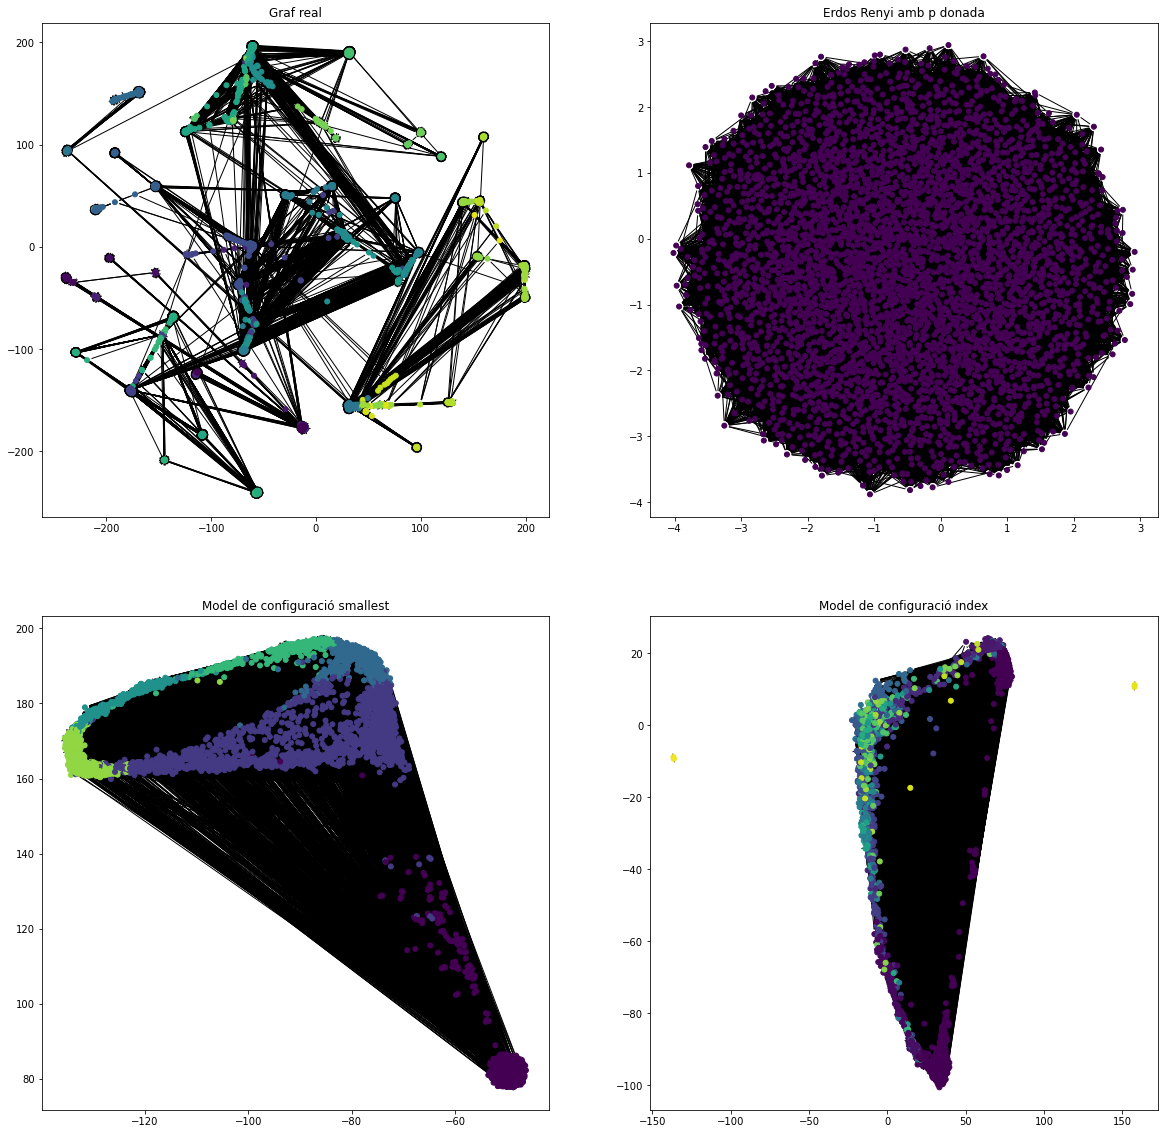

In [19]:
%%time
# visualitzam les comunitats
fig, (ax1,ax2) = plt.subplots(2,2)
print(0)
igraph.plot(community_infomap[0], target=ax1[0])
ax1[0].set_title("Graf real")
igraph.plot(community_infomap[1], target=ax1[1])
ax1[1].set_title("Erdos Renyi amb p donada")
print(2)
igraph.plot(community_infomap[5], target=ax2[0])
ax2[0].set_title("Model de configuració smallest")
igraph.plot(community_infomap[11], target=ax2[1])
ax2[1].set_title("Model de configuració index")

0
2
Wall time: 7min 14s


Text(0.5, 1.0, 'Model de configuració index')

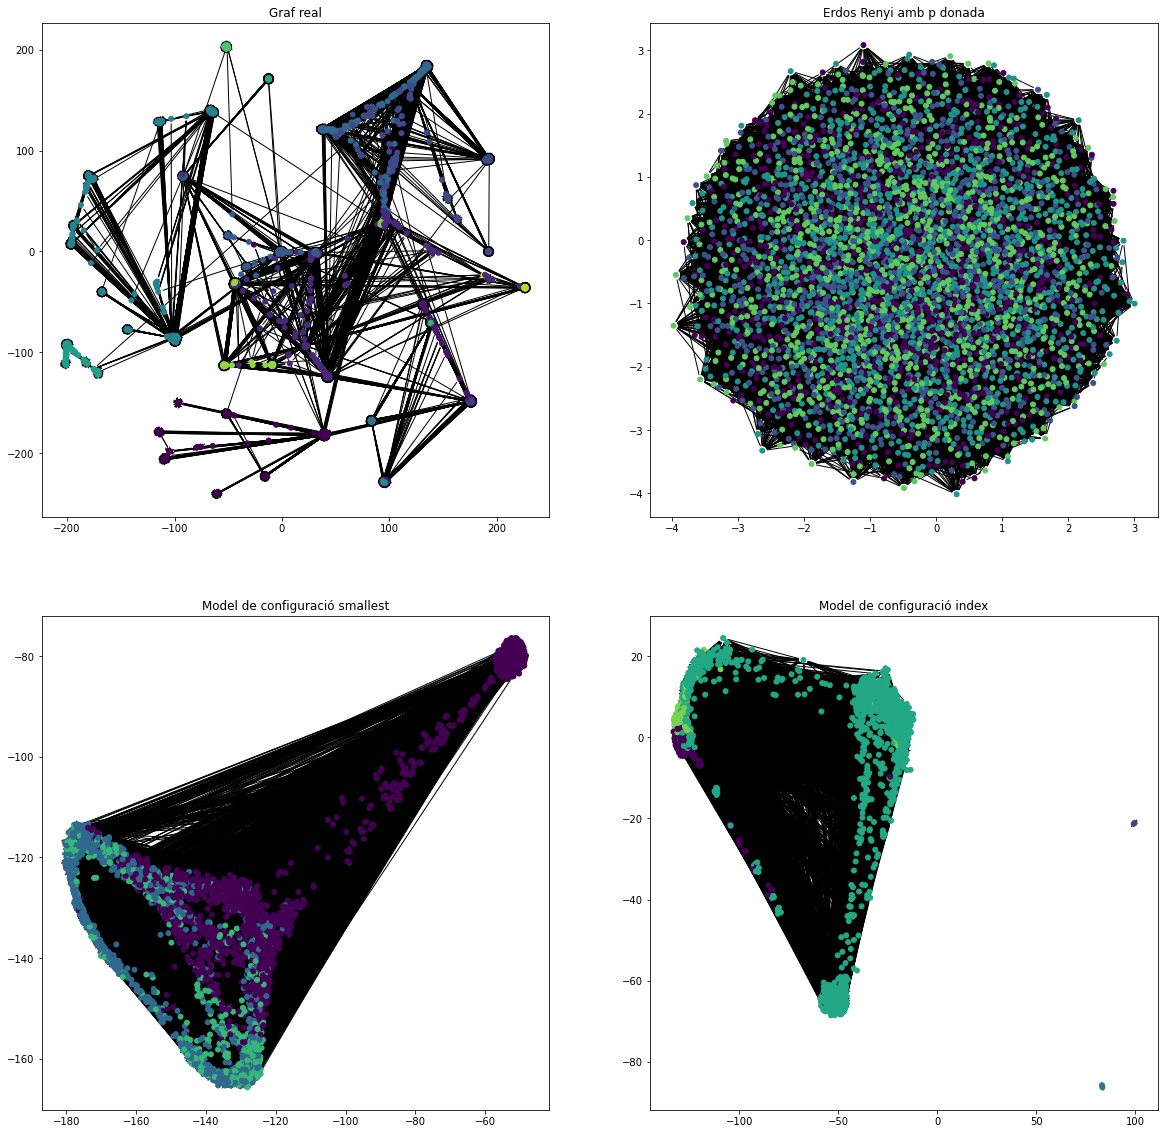

In [20]:
%%time
fig, (ax1,ax2) = plt.subplots(2,2)# visualitzam les comunitats
print(0)
igraph.plot(community_leading_eigenvector[0], target=ax1[0])
ax1[0].set_title("Graf real")
igraph.plot(community_leading_eigenvector[1], target=ax1[1])
ax1[1].set_title("Erdos Renyi amb p donada")
print(2)
igraph.plot(community_leading_eigenvector[5], target=ax2[0])
ax2[0].set_title("Model de configuració smallest")
igraph.plot(community_leading_eigenvector[11], target=ax2[1])
ax2[1].set_title("Model de configuració index")

In [10]:
%%time
tamanys_over_percolacio = []#calculam la percolacio uniforme
G_copia=G.copy()
tamany_GC=[]
for _ in range(4038):
    G_copia.vs[random.randint(0,G_copia.vcount()-1)].delete()
    tamany_GC.append(G_copia.clusters().giant().vcount())
tamanys_over_percolacio.append(tamany_GC)
for graf in G_ER:
    G_copia=graf.copy()
    tamany_GC=[]
    for _ in range(4038):
        G_copia.vs[random.randint(0,G_copia.vcount()-1)].delete()
        tamany_GC.append(G_copia.clusters().giant().vcount())
    tamanys_over_percolacio.append(tamany_GC)
for graf in G_MC:
    G_copia=graf.copy()
    tamany_GC=[]
    for _ in range(4038):
        G_copia.vs[random.randint(0,G_copia.vcount()-1)].delete()
        tamany_GC.append(G_copia.clusters().giant().vcount())
    tamanys_over_percolacio.append(tamany_GC)

Wall time: 236 ms


Text(0.5, 1.0, 'Model de configuració index')

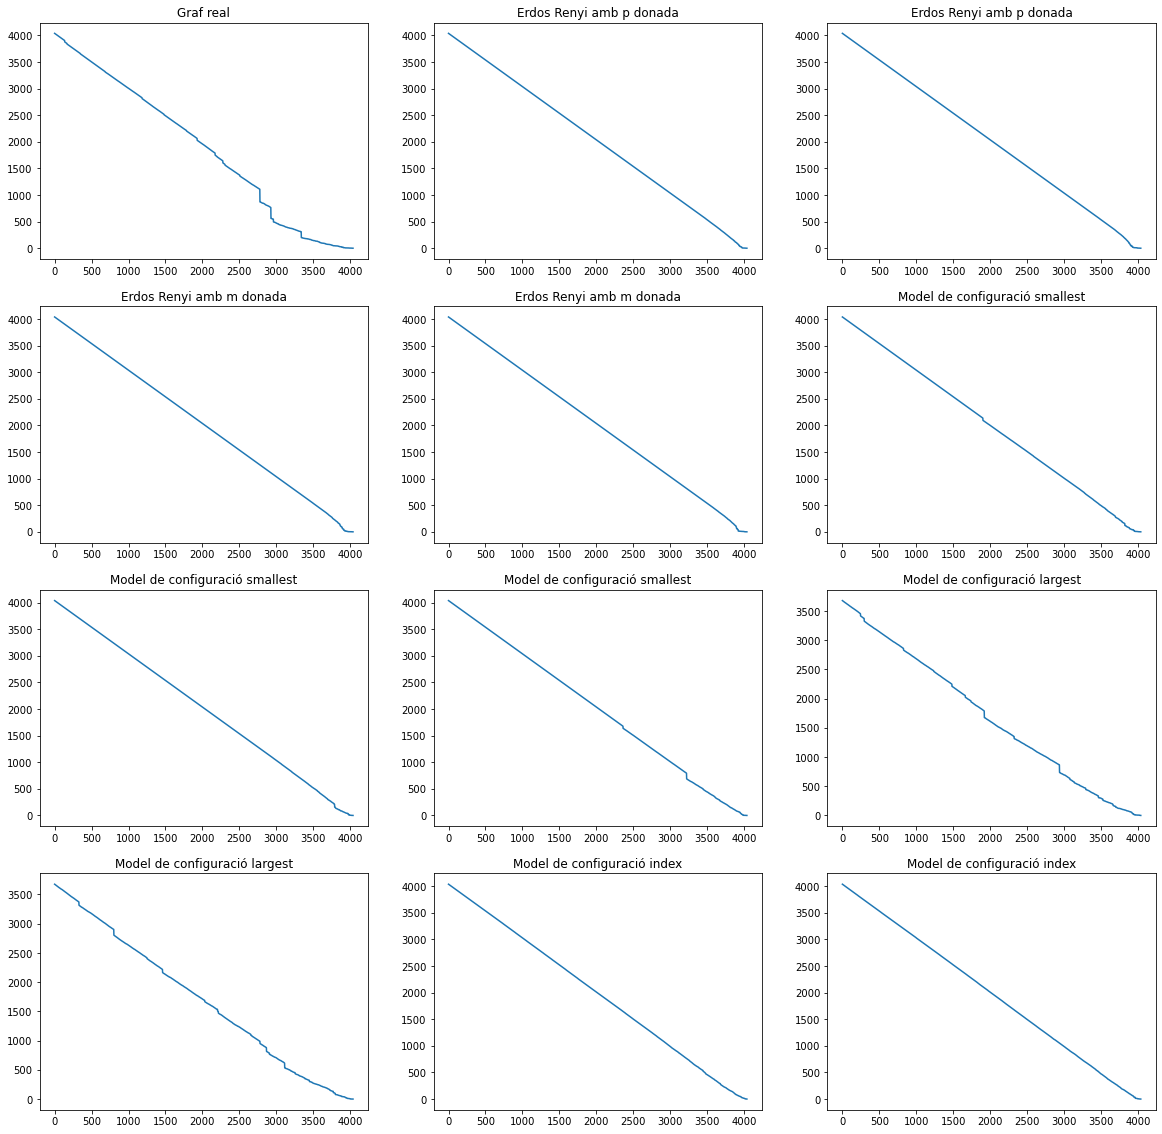

In [12]:
%%time
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,3)#
ax1[0].plot(tamanys_over_percolacio[0])
ax1[0].set_title("Graf real")
ax1[1].plot(tamanys_over_percolacio[1])
ax1[1].set_title("Erdos Renyi amb p donada")
ax1[2].plot(tamanys_over_percolacio[2])
ax1[2].set_title("Erdos Renyi amb p donada")

ax2[0].plot(tamanys_over_percolacio[3])
ax2[0].set_title("Erdos Renyi amb m donada")
ax2[1].plot(tamanys_over_percolacio[4])
ax2[1].set_title("Erdos Renyi amb m donada")
ax2[2].plot(tamanys_over_percolacio[5])
ax2[2].set_title("Model de configuració smallest")

ax3[0].plot(tamanys_over_percolacio[6])
ax3[0].set_title("Model de configuració smallest")
ax3[1].plot(tamanys_over_percolacio[7])
ax3[1].set_title("Model de configuració smallest")
ax3[2].plot(tamanys_over_percolacio[8])
ax3[2].set_title("Model de configuració largest")

ax4[0].plot(tamanys_over_percolacio[9])
ax4[0].set_title("Model de configuració largest")
ax4[1].plot(tamanys_over_percolacio[10])
ax4[1].set_title("Model de configuració index")
ax4[2].plot(tamanys_over_percolacio[11])
ax4[2].set_title("Model de configuració index")


In [16]:
%%time
tamanys_over_percolacio = []#calculam la percolacio no uniforme
G_copia=G.copy()
tamany_GC=[]


for _ in range(4038):
    G_copia.vs[G_copia.degree().index(max(G_copia.degree()))].delete()
    tamany_GC.append(G_copia.clusters().giant().vcount())
tamanys_over_percolacio.append(tamany_GC)
for graf in G_ER:
    G_copia=graf.copy()
    tamany_GC=[]
    for _ in range(4038):
        G_copia.vs[G_copia.degree().index(max(G_copia.degree()))].delete()
        tamany_GC.append(G_copia.clusters().giant().vcount())
    tamanys_over_percolacio.append(tamany_GC)
for graf in G_MC:
    G_copia=graf.copy()
    tamany_GC=[]
    for _ in range(4038):
        G_copia.vs[G_copia.degree().index(max(G_copia.degree()))].delete()
        tamany_GC.append(G_copia.clusters().giant().vcount())
    tamanys_over_percolacio.append(tamany_GC)

Wall time: 3min 51s


Wall time: 257 ms


Text(0.5, 1.0, 'Model de configuració index')

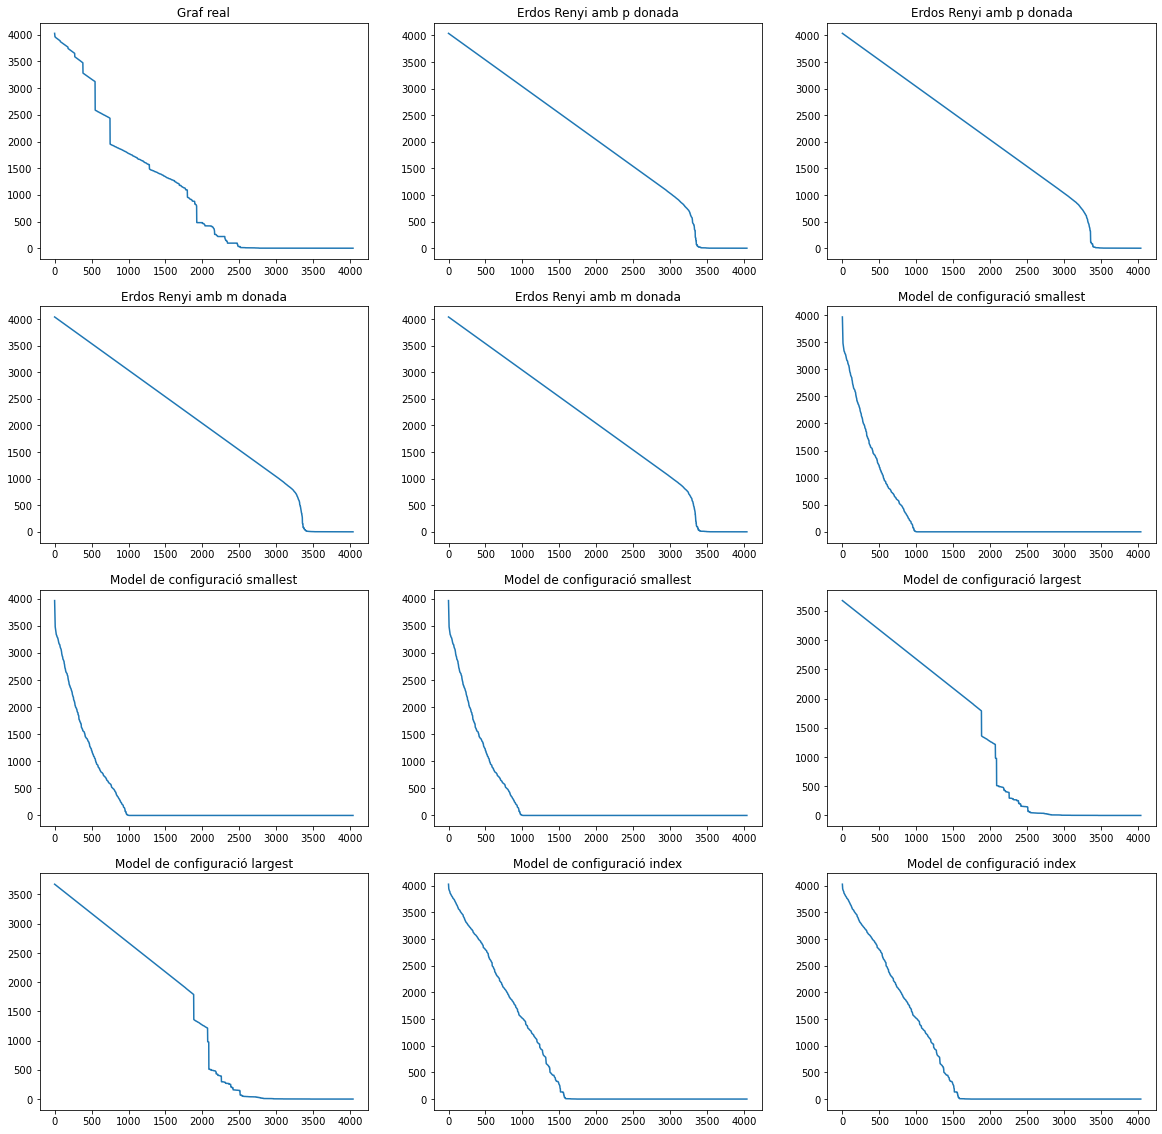

In [17]:
%%time
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,3)#
ax1[0].plot(tamanys_over_percolacio[0])
ax1[0].set_title("Graf real")
ax1[1].plot(tamanys_over_percolacio[1])
ax1[1].set_title("Erdos Renyi amb p donada")
ax1[2].plot(tamanys_over_percolacio[2])
ax1[2].set_title("Erdos Renyi amb p donada")

ax2[0].plot(tamanys_over_percolacio[3])
ax2[0].set_title("Erdos Renyi amb m donada")
ax2[1].plot(tamanys_over_percolacio[4])
ax2[1].set_title("Erdos Renyi amb m donada")
ax2[2].plot(tamanys_over_percolacio[5])
ax2[2].set_title("Model de configuració smallest")

ax3[0].plot(tamanys_over_percolacio[6])
ax3[0].set_title("Model de configuració smallest")
ax3[1].plot(tamanys_over_percolacio[7])
ax3[1].set_title("Model de configuració smallest")
ax3[2].plot(tamanys_over_percolacio[8])
ax3[2].set_title("Model de configuració largest")

ax4[0].plot(tamanys_over_percolacio[9])
ax4[0].set_title("Model de configuració largest")
ax4[1].plot(tamanys_over_percolacio[10])
ax4[1].set_title("Model de configuració index")
ax4[2].plot(tamanys_over_percolacio[11])
ax4[2].set_title("Model de configuració index")